<a href="https://colab.research.google.com/github/Antonyjerson/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : JERSON S

Batch: D15

Project on : Credit Card Default Prediction

**IMPORTING NEEDED LIBRARIES**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [56]:
data=pd.read_csv("/content/Credit_default_dataset.csv")


**DATA CLEANING**

In [57]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [58]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [115]:
data.shape

(30000, 24)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [60]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


CHECKING NAN VALUES


In [61]:
data.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [62]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [106]:
data.isnull().sum().sum()

0

In [63]:
data.drop(['ID'],axis=1,inplace=True)

RE-NAMEMING FROM PAY_0 TO PAY_1

In [64]:
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [65]:
col=["SEX", "EDUCATION","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for i in col:
  print(i,"--",data[i].unique())

SEX -- [2 1]
EDUCATION -- [2 1 3 5 4 6 0]
PAY_1 -- [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 -- [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 -- [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 -- [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 -- [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 -- [-2  2  0 -1  3  6  4  7  8  5]


**EXPLORATORY DATA ANALYSIS - (EDA)**

<AxesSubplot:title={'center':'EDUCATION vs LIMIT_BAL'}, xlabel='EDUCATION', ylabel='LIMIT_BAL'>

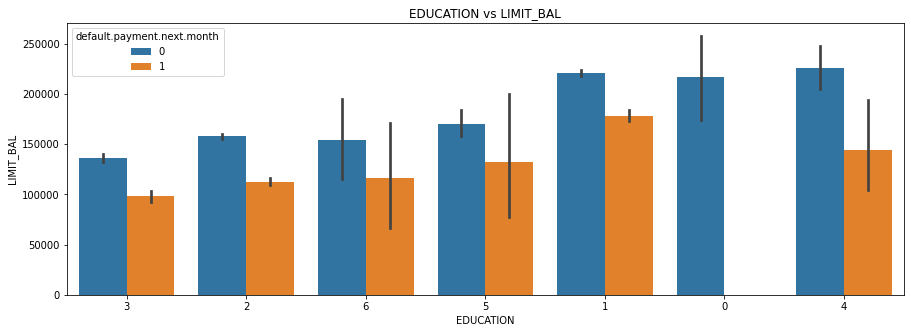

In [67]:
plt.figure(figsize=(15,5))
plt.title("EDUCATION vs LIMIT_BAL")
sns.barplot(x="EDUCATION",y="LIMIT_BAL",hue="default.payment.next.month",data= data,order=data.groupby('EDUCATION')['LIMIT_BAL'].mean().reset_index().sort_values('LIMIT_BAL')['EDUCATION'])

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

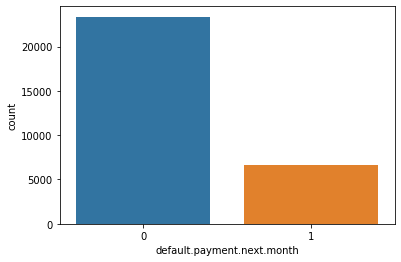

In [68]:
sns.countplot(x="default.payment.next.month",data=data)

In [69]:
data["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

**OVER SAMPLING**

In [73]:
from sklearn.utils import resample
data_major=data[data["default.payment.next.month"]==0]
data_minor=data[data["default.payment.next.month"]==1]

In [74]:
data_minor_oversampled =resample(data_minor,replace=True, n_samples=23364,random_state=10)

In [75]:
data_uci = pd.concat((data_major,data_minor_oversampled))

0    23364
1    23364
Name: default.payment.next.month, dtype: int64


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

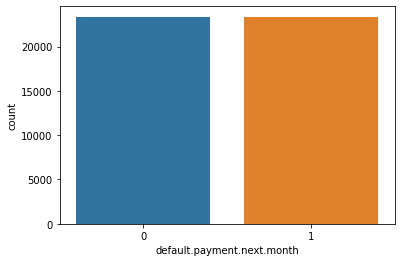

In [76]:
print(data_uci["default.payment.next.month"].value_counts())

sns.countplot(x="default.payment.next.month",data=data_uci)

In [77]:
X= data_uci.iloc[:,:-1]
Y= data_uci["default.payment.next.month"]
print(X.shape, Y.shape)

(46728, 23) (46728,)


**CORRELATION**

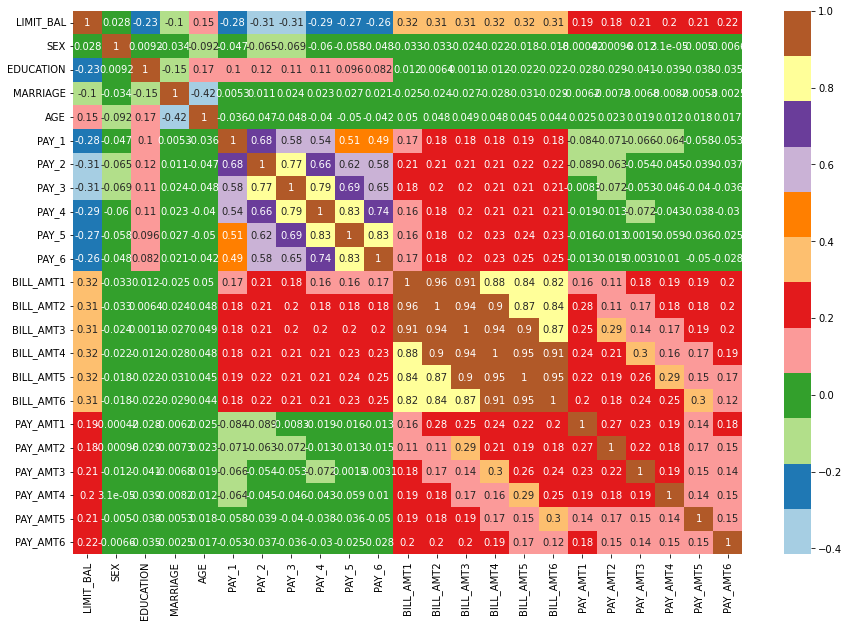

In [83]:
plt.figure(figsize=(15,10))
cor= X.corr()
sns.heatmap(cor, annot=True,cmap="Paired")
plt.show()

In [85]:
def correlation(dataset, threshold):
  col_corr =set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]   
        col_corr.add(colname)
  return col_corr

In [86]:
corr_features = correlation(X, 0.9)
print(corr_features)

{'BILL_AMT6', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT5'}


**DROPPED HIGHLY CORRELATED FEATURES**

In [87]:
data_uci.drop(['BILL_AMT6', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT5'], axis=1,inplace=True)

In [88]:
X= data_uci.iloc[:,:-1]
Y= data_uci["default.payment.next.month"]
print(X.shape, Y.shape)

(46728, 18) (46728,)


**TRAIN TEST SPLITTING**


In [92]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train,X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(32709, 18) (32709,) (14019, 18) (14019,)


**STANDARD SCALING**

In [93]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**MODEL FITTING**

LIBRARIES FOR MODEL FITTING


In [96]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
#for accuracy:
from sklearn import metrics
#for evaluation matrix:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report



**LOGISTIC REGRESSION**

In [103]:
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
LR=model_log.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test, LR))
print("confusion matrix:\n",confusion_matrix(Y_test, LR),"\n")
print("classification report:\n", classification_report(Y_test, LR),"\n")


Accuracy score: 0.6743704971823953
confusion matrix:
 [[4918 2040]
 [2525 4536]] 

classification report
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      6958
           1       0.69      0.64      0.67      7061

    accuracy                           0.67     14019
   macro avg       0.68      0.67      0.67     14019
weighted avg       0.68      0.67      0.67     14019
 



**DECISION TREE**

In [107]:
model_DT=DecisionTreeClassifier(criterion="gini",splitter="best",random_state=10)
model_DT.fit(X_train,Y_train)
DT=model_DT.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test, DT))
print("confusion matrix:\n",confusion_matrix(Y_test, DT),"\n")
print("classification report:\n", classification_report(Y_test, DT),"\n")

Accuracy score: 0.8612597189528497
confusion matrix:
 [[5417 1541]
 [ 404 6657]] 

classification report
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      6958
           1       0.81      0.94      0.87      7061

    accuracy                           0.86     14019
   macro avg       0.87      0.86      0.86     14019
weighted avg       0.87      0.86      0.86     14019
 



**KNN CLASSIFIER**

In [105]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric="euclidean")
model_KNN.fit(X_train,Y_train)
KNN = model_KNN.predict(X_test)


print("Accuracy score:",accuracy_score(Y_test, KNN))
print("confusion matrix:\n",confusion_matrix(Y_test, KNN),"\n")
print("classification report:\n", classification_report(Y_test, KNN),"\n")


Accuracy score: 0.6949853769883729
confusion matrix:
 [[5932 1026]
 [3250 3811]] 

classification report
               precision    recall  f1-score   support

           0       0.65      0.85      0.74      6958
           1       0.79      0.54      0.64      7061

    accuracy                           0.69     14019
   macro avg       0.72      0.70      0.69     14019
weighted avg       0.72      0.69      0.69     14019
 



**RANDOM FOREST**

In [109]:
model_RF=RandomForestClassifier(n_estimators=100,random_state=10)
model_RF.fit(X_train,Y_train)
RF=model_RF.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test, RF))
print("confusion matrix:\n",confusion_matrix(Y_test, RF),"\n")
print("classification report:\n", classification_report(Y_test, RF),"\n")


Accuracy score: 0.9247449889435766
confusion matrix:
 [[6265  693]
 [ 362 6699]] 

classification report
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      6958
           1       0.91      0.95      0.93      7061

    accuracy                           0.92     14019
   macro avg       0.93      0.92      0.92     14019
weighted avg       0.93      0.92      0.92     14019
 



**XG BOOST**

In [111]:
model_XGB= XGBClassifier(n_estimators=100,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test, XGB))
print("confusion matrix:\n",confusion_matrix(Y_test, XGB),"\n")
print("classification report:\n", classification_report(Y_test, XGB),"\n")

Accuracy score: 0.7203794849846636
confusion matrix:
 [[5563 1395]
 [2525 4536]] 

classification report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      6958
           1       0.76      0.64      0.70      7061

    accuracy                           0.72     14019
   macro avg       0.73      0.72      0.72     14019
weighted avg       0.73      0.72      0.72     14019
 



**SUPPORT VECTOR MACHINE**

In [112]:
model_svm=SVC(kernel='rbf', C=1, gamma=0.01)
model_svm.fit(X_train,Y_train)
SVM=model_svm.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test, SVM))
print("confusion matrix:\n",confusion_matrix(Y_test, SVM),"\n")
print("classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score: 0.7004065910549968
confusion matrix:
 [[5841 1117]
 [3083 3978]] 

classification report
               precision    recall  f1-score   support

           0       0.65      0.84      0.74      6958
           1       0.78      0.56      0.65      7061

    accuracy                           0.70     14019
   macro avg       0.72      0.70      0.70     14019
weighted avg       0.72      0.70      0.69     14019
 



In [113]:
from sklearn.model_selection import cross_val_predict
CV_XGB = cross_val_score(model_XGB,X_train,Y_train,cv=10).mean()
print("The cross validation score of an XGBoost is:",CV_XGB)

The cross validation score of an XGBoost is: 0.7206882557027421


**RESULT** :


*   THE GIVEN  DATASET IS A SUPERVISED LEARNING CLASSIFICATION DATASET WITH IMBALANCED DATA.

*   SINCE IMBALANCED DATA HERE USED OVER SAMPLING TECHNIQUE TO BALANCED IT.


*   CORRELEATION HAS MADE AND SOME HIGHLY CORRELATED FEATURE HAS BEEN DROPPED.

*   STANDARD SCALING IS DONE.



*   DIFFERENT MODEL HAS DONE LIKE LOGISTIC REGRESSION,RANDOMFOREST,DECISION TREE,SUPPORT VECTOR MACHINE,KNN, AND XG BOOST.

*   IN THIS PROJECT RANDOM FOREST MODEL IS PREDICTED WELL GOOD THAN OTHER MODELS.

*   ALL THE WORKPROCESS IS MADE WITH DATAPIPELINE PROCESS.









